# Used Car Price Prediction

![](https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/appreciatedusedcars-1627577414.jpg?crop=1.00xw:1.00xh;0,0&resize=980:*)

## Introduction

This project is attempting to use supervised machine learning to predict the price of a used car given certain inputs such as the manufacturer, number of cylinders. That is essentially the core of machine learning as a concept; we take a set of data, sanitize it to be readable for a computer, and give it to a machine learning algorithm to produce a result to predict the future.

There are two forms of supervised machine learning problems: Regression and Classification.

Regression is producing an output number or numbers given a variable number of inputs such as date, weather, price, depending on the dataset 

Classification on the other hand is more often a yes or no question such as does this person have X medical condition, given a variable number of inputs such as age, weight, height, once again depending on the dataset.

This project is a regression problem as it requires a single number as the output; the predicted price of a used car given certain inputs.


## Project Outline

1. Install and Import Required Libraries
2. Download the Dataset
3. Column Description
4. Cleaning Data
5. Exploratory Data Analysis
6. Feature Engineering
7. Training/Test/Validation
8. Imputation, Scaling and Encoding
9. Dumb/Benchmark Model - Mean Value
10. Machine Learning Models
11. Comparing Results
12. Conclusion and Further Improvements


## Libraries Used

 - [os](https://docs.python.org/3/library/os.html)
 - [opendatasets](https://github.com/JovianML/opendatasets)
 - [numpy](https://numpy.org/)
 - [pandas](https://pandas.pydata.org/)
 - [matplotlib](https://matplotlib.org/)
 - [seaborn](https://seaborn.pydata.org/)
 - [selenium](https://www.selenium.dev/)
 - [time](https://docs.python.org/3/library/time.html)
 - [psutil](https://pypi.org/project/psutil/)
 - [scikit-learn](https://scikit-learn.org/)
 - [xgboost](https://xgboost.readthedocs.io/)
 - [regex](https://docs.python.org/3/library/re.html)

# 1. Install and Import Required Libraries

## Section Outline

- Install required libraries
- Import libraries
- set options for matplotlib and pandas

In [ ]:
# Install all of the libraries 
!pip install numpy pandas-profiling matplotlib seaborn opendatasets --quiet

In [ ]:
# Import all of the libraries to be used in the project
import os
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor, plot_tree
%matplotlib inline

# Set options for matplotlib and pandas
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
pd.options.display.max_columns = 100
pd.options.display.max_rows = 50

In [ ]:
# Save the project
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/nsrinath97/used-car-price-prediction-machine-learning-project


'https://jovian.ai/nsrinath97/used-car-price-prediction-machine-learning-project'

# 2. Download the Dataset

## Section Outline

- Download the dataset from kaggle using opendatasets
- Create the dataframe using Pandas to read the downloaded csv file
- Show a sample of the DataFrame 

In [ ]:
# Download the dataset with opendatasets
od.download('https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data')
os.listdir('craigslist-carstrucks-data')

Skipping, found downloaded files in "./craigslist-carstrucks-data" (use force=True to force download)


['vehicles.csv']

In [ ]:
# Create DataFrame
raw_df = pd.read_csv('./craigslist-carstrucks-data/vehicles.csv')

In [ ]:
raw_df.sample(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
159789,7306148169,https://iowacity.craigslist.org/ctd/d/cedar-fa...,iowa city,https://iowacity.craigslist.org,5995,2009.0,jeep,patriot,good,4 cylinders,gas,NaN,clean,manual,1J4FF28B59D176889,4wd,NaN,SUV,silver,https://images.craigslist.org/01616_hmRuCPawUf...,2009 *** Jeep Patriot 4WD 4dr Sport SUV *** ...,NaN,ia,42.504855,-92.405424,2021-04-13T10:01:32-0500
330309,7313559130,https://lancaster.craigslist.org/ctd/d/lancast...,lancaster,https://lancaster.craigslist.org,12990,2013.0,honda,pilot ex-l awd,NaN,NaN,gas,164360.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00j0j_965Hnr69P1...,LOADED! LEATHER! MOONROOF! NAVIGATION! 3RD ROW...,NaN,pa,40.057044,-76.313026,2021-04-27T17:40:28-0400
312704,7310941632,https://bend.craigslist.org/ctd/d/gladstone-20...,bend,https://bend.craigslist.org,7988,2007.0,lexus,is 250 - backup camera - automatic - navigatio...,NaN,6 cylinders,gas,108877.0,salvage,manual,JTHBK262175028487,rwd,NaN,sedan,black,https://images.craigslist.org/00h0h_ezbP5Ob8MD...,Contact Info NW Truck & SUV (503) 344-6292 DL0...,NaN,or,45.389971,-122.611386,2021-04-22T10:48:40-0700
400298,7315005372,https://bellingham.craigslist.org/cto/d/bellin...,bellingham,https://bellingham.craigslist.org,1500,1997.0,ford,escort,NaN,NaN,gas,141430.0,clean,manual,NaN,NaN,NaN,wagon,NaN,https://images.craigslist.org/00l0l_7JDv7UCO8r...,This is a very basic car and a little rough ar...,NaN,wa,48.749000,-122.488700,2021-04-30T13:32:39-0700
227077,7305632398,https://greatfalls.craigslist.org/ctd/d/coeur-...,great falls,https://greatfalls.craigslist.org,37998,2018.0,jeep,grand cherokee,NaN,6 cylinders,diesel,12623.0,clean,automatic,1C4RJEBM5JC442984,rwd,NaN,SUV,NaN,https://images.craigslist.org/00O0O_5TM6p4AxJy...,For more information on this Jeep and to acces...,NaN,mt,47.798900,-116.742300,2021-04-12T09:22:03-0600


# 4. Cleaning Data

## Section Outline

- Remove unnecessary columns and unusable data entries
- Fill in missing data using the description column where possible
- Group data under a certain level of abundance into the same category



In [ ]:
raw_df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
round(raw_df.describe(), 2)

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.00,422480.00,0.0,420331.00,420331.00
mean,7.311487e+09,7.519903e+04,2011.24,98043.33,NaN,38.49,-94.75
std,4.473170e+06,1.218228e+07,9.45,213881.50,NaN,5.84,18.37
min,7.207408e+09,0.000000e+00,1900.00,0.00,NaN,-84.12,-159.83
25%,7.308143e+09,5.900000e+03,2008.00,37704.00,NaN,34.60,-111.94
50%,7.312621e+09,1.395000e+04,2013.00,85548.00,NaN,39.15,-88.43
75%,7.315254e+09,2.648575e+04,2017.00,133542.50,NaN,42.40,-80.83
max,7.317101e+09,3.736929e+09,2022.00,10000000.00,NaN,82.39,173.89


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
# Filter out unneccessary columns
data_df = raw_df[['region', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'posting_date', 'description']]

In [ ]:
round(data_df.describe(), 2)

,price,year,odometer
count,4.268800e+05,425675.00,422480.00
mean,7.519903e+04,2011.24,98043.33
std,1.218228e+07,9.45,213881.50
min,0.000000e+00,1900.00,0.00
25%,5.900000e+03,2008.00,37704.00
50%,1.395000e+04,2013.00,85548.00
75%,2.648575e+04,2017.00,133542.50
max,3.736929e+09,2022.00,10000000.00


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  posting_date  426812 non-null  object 
 15  description   426810 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 52.1+ MB


In [ ]:
# Find how much each column correlates to arrival delay
data_df.corr()['price'].sort_values(ascending=False)

price       1.000000
odometer    0.010032
year       -0.004925
Name: price, dtype: float64

In [ ]:
# Check how many unique values are in each column
data_df.nunique()

region             404
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
drive                3
size                 4
type                13
posting_date    381536
description     360911
dtype: int64

In [ ]:
# filter out outliers in the price and odometer columns
data_df = data_df[(data_df['price'] < 100000) & (data_df['price'] > 1000)]
data_df = data_df[(data_df['odometer'] < 300000) & (data_df['odometer'] > 10000)]

# filter out all data where cylinders, transmission, and drive columns are all null at the same time
data_df.drop(data_df[(data_df['cylinders'].isna()) & (data_df['transmission'].isna()) & (data_df['drive'].isna())].index, inplace = True)

# display only the number of cylinders in the cylinders column
data_df['cylinders'] = data_df['cylinders'].apply(lambda x: x.split()[0] if not pd.isnull(x) else np.nan)

# change the tesla element in the manufacturers column to show as 0 cylinders rather than 'other'
data_df.loc[data_df['manufacturer'] == 'tesla', 'cylinders'] = 0
data_df['cylinders'].fillna(0, inplace=True)
data_df['cylinders'].replace('other', 0, inplace=True)

# change the cylinders column to type int
data_df = data_df.astype({'cylinders': int})

# replace 'like new' and 'new' with 'excellent in the condition column
data_df['condition'].replace('like new', 'excellent', inplace=True)
data_df['condition'].replace('new', 'excellent', inplace=True)

# use the description column to grab data for missing transmission entries
data_df["description"]=data_df["description"].apply(lambda x:str(x).lower())
data_df.loc[(data_df['description'].str.contains('automatic transmission')) & (data_df['transmission'] == 'other'), "transmission"] = "automatic"
data_df.loc[(data_df['description'].str.contains('manual transmission')) & (data_df['transmission'] == 'other'), "transmission"] = "manual"
data_df.loc[(data_df['description'].str.contains('automatic transmission')) & (data_df['transmission'].isna()), "transmission"] = "automatic"
data_df.loc[(data_df['description'].str.contains('manual transmission')) & (data_df['transmission'].isna()), "transmission"] = "manual"

# use the description column to grab data for missing manufacturer entries
manufacturer = data_df['manufacturer'].unique().tolist()
manufacturer.remove(np.NaN)
manu_str = '|'.join(manufacturer)
data_df['manufacturer'] = data_df['manufacturer'].fillna(data_df['model'].str.contains(manu_str, case=False))
data_df['manufacturer'] = data_df['manufacturer'].fillna(data_df['description'].str.contains(manu_str, case=False))

# fill missing years with the median of odometer based on year
odo_year_med = dict(data_df.groupby('year')['odometer'].median())
data_df['year'] = data_df['year'].fillna(data_df['odometer'].apply(lambda x: odo_year_med.get(x)))

# group the regions under the top 50 and manufacturers under the top 25 respectively, into 'others'
region = data_df['region'].value_counts()
manufacturer = data_df['manufacturer'].value_counts()
data_df['region'] = data_df['region'].apply(lambda x: x if str(x) in region[:50] else 'others')
data_df['manufacturer'] = data_df['manufacturer'].apply(lambda x: x if str(x) in manufacturer[:25] else 'others')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,posting_date,description
27,others,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,clean,other,NaN,NaN,pickup,2021-05-04T12:31:18-0500,carvana is the safer way to buy a car during t...
28,others,22590,2010.0,chevrolet,silverado 1500,good,8,gas,71229.0,clean,other,NaN,NaN,pickup,2021-05-04T12:31:08-0500,carvana is the safer way to buy a car during t...
29,others,39590,2020.0,chevrolet,silverado 1500 crew,good,8,gas,19160.0,clean,other,NaN,NaN,pickup,2021-05-04T12:31:25-0500,carvana is the safer way to buy a car during t...
30,others,30990,2017.0,toyota,tundra double cab sr,good,8,gas,41124.0,clean,other,NaN,NaN,pickup,2021-05-04T10:41:31-0500,carvana is the safer way to buy a car during t...
31,others,15000,2013.0,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,rwd,full-size,truck,2021-05-03T14:02:03-0500,2013 f-150 xlt v6 4 door. good condition. leve...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426874,others,33590,2018.0,lexus,gs 350 sedan 4d,good,6,gas,30814.0,clean,automatic,rwd,NaN,sedan,2021-04-04T03:21:34-0600,carvana is the safer way to buy a car during t...
426875,others,23590,2019.0,nissan,maxima s sedan 4d,good,6,gas,32226.0,clean,other,fwd,NaN,sedan,2021-04-04T03:21:31-0600,carvana is the safer way to buy a car during t...
426876,others,30590,2020.0,others,s60 t5 momentum sedan 4d,good,0,gas,12029.0,clean,other,fwd,NaN,sedan,2021-04-04T03:21:29-0600,carvana is the safer way to buy a car during t...
426878,others,28990,2018.0,lexus,es 350 sedan 4d,good,6,gas,30112.0,clean,other,fwd,NaN,sedan,2021-04-04T03:21:11-0600,carvana is the safer way to buy a car during t...


# 5. Exploratory Data Analysis

## Section Outline

- Plot graphs for various columns vs price to visualize the correlation

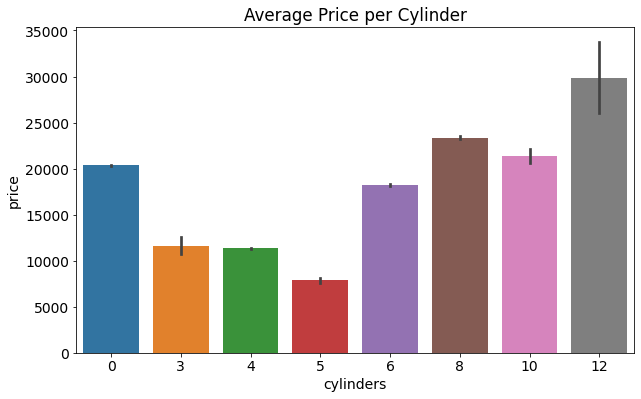

In [ ]:
plt.title('Average Price per Cylinder')
sns.barplot(data=data_df, x='cylinders', y='price')
plt.show()

The average price per number of cylinders in the engine i.e. checking the correlation between power and price. There's a large jump in price between 4 to 6 cylinders as well as 0 cylinders due to them being electric cars.

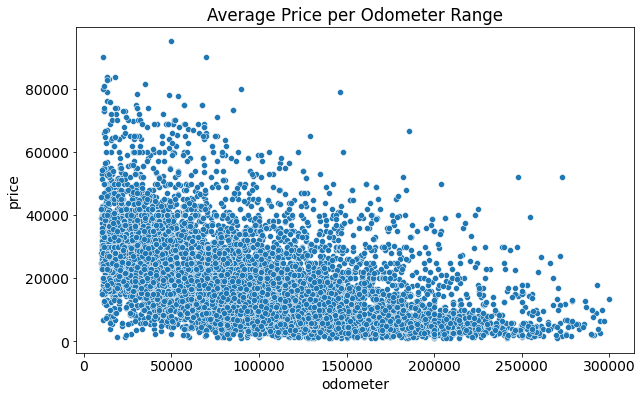

In [ ]:
plt.title('Average Price per Odometer Range')
sns.scatterplot(data=data_df.sample(10000), x='odometer', y='price')

The correlation between price and distance travelled in the car. It seems to be a negative correlation, the lower the range, the higher the price.

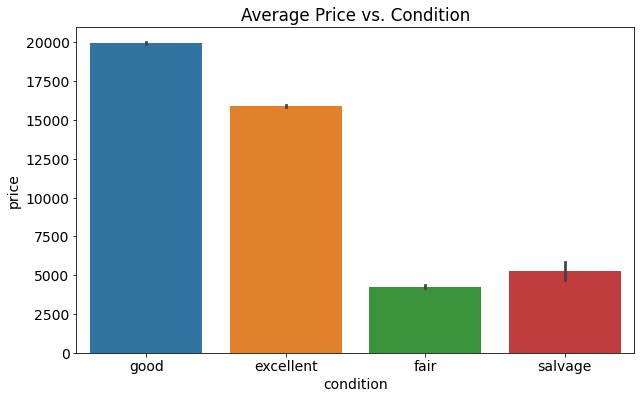

In [ ]:
plt.title('Average Price vs. Condition')
sns.barplot(data=data_df, x='condition', y='price')
plt.show()

The correlation between the condition of the car and how much it costs. As expected the better condition cars cost more than the worse ones. However, good seems to cost more on average than excellent.

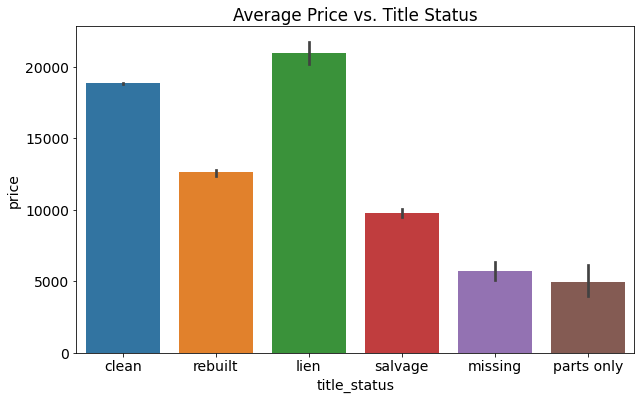

In [ ]:
plt.title('Average Price vs. Title Status')
sns.barplot(data=data_df, x='title_status', y='price')
plt.show()

Check the price correlation with the title status. As expected clean is more expensive than rebuilt, but the most expensive cars are the ones with a lien. This might be the case due to more expensive cars being the subject of a lien with the lienee not being able to afford them anymore.

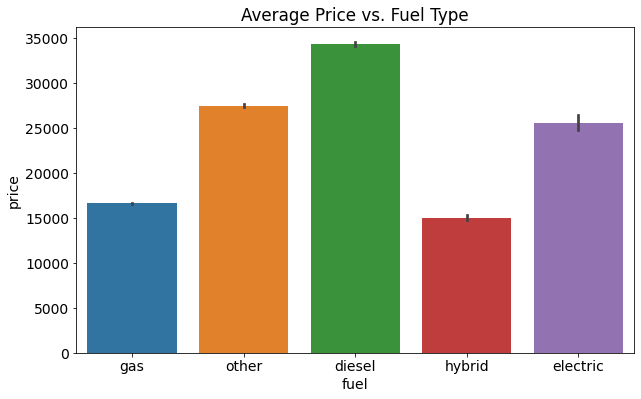

In [ ]:
plt.title('Average Price vs. Fuel Type')
sns.barplot(data=data_df, x='fuel', y='price')
plt.show()

According to the data, diesel cars are by far and away the most expensive, especially compared to gas. [This source](https://www.moneyunder30.com/will-owning-a-diesel-save-you-money) shows that on average a diesel car costs more than their gas counterparts by 2500 - 4000 dollars, which doesn't account for the entire cost difference, but another explanation could be that diesel cars on average are more expensive than gas cars by a significant amount. Electric cars are more expensive than gas in general due to the new age of the technology which also means that the cars on sale would be newer further adding to the cost. 

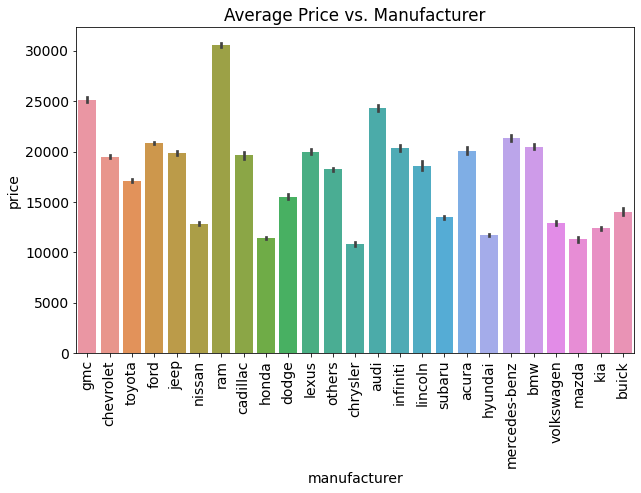

In [ ]:
plt.title('Average Price vs. Manufacturer')
sns.barplot(data=data_df, x='manufacturer', y='price')
plt.xticks(rotation=90)
plt.show()

The price per manufacturer. In this case it's unsurprising to see that Audi, Infiniti, BMW and other luxury brands are at the higher end of the scale. The outliers are RAM and GMC at 30K and 25K respectively. The reason for this could be high powered trucks that sell for quite a bit on the used market in the United States, compared to used luxury vehicles.

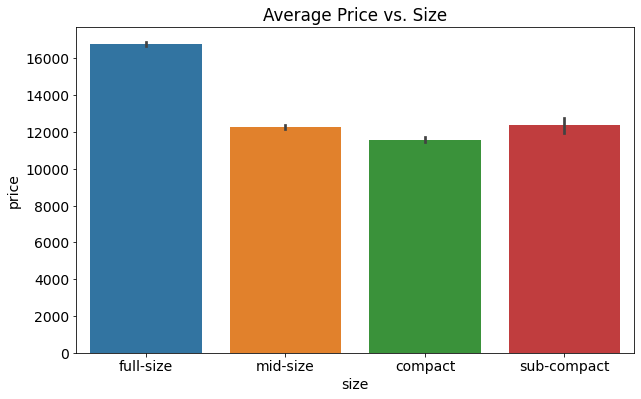

In [ ]:
plt.title('Average Price vs. Size')
sns.barplot(data=data_df, x='size', y='price')
plt.show()

The average price vs size of the car. It's no surprise that the larger car costs more compared to the smaller one.

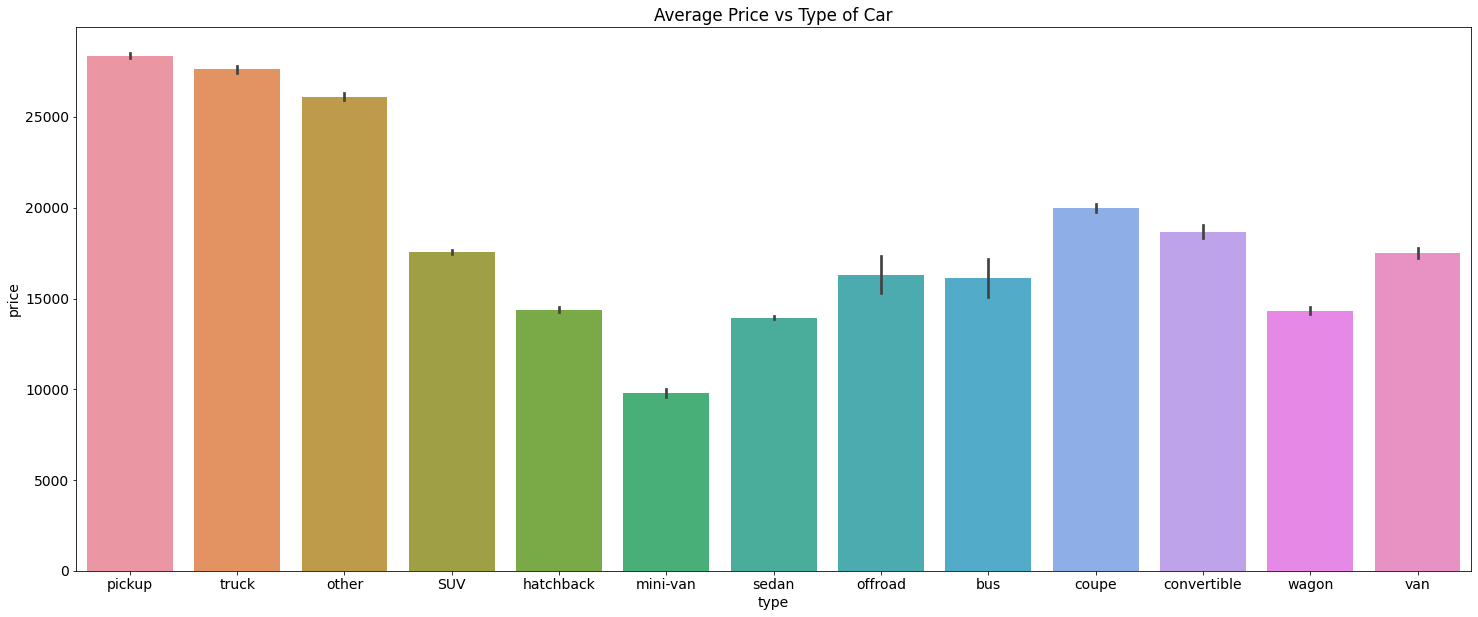

In [ ]:
plt.figure(figsize=(25, 10))
sns.barplot(data=data_df, x='type', y='price')
plt.title('Average Price vs Type of Car')
plt.show()

This graph essentially confirms the previous two graphs, the larger vehicles and high powered trucks cost more on average.

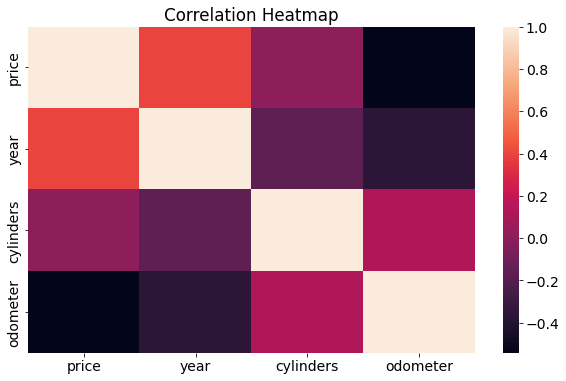

In [ ]:
plt.title('Correlation Heatmap')
sns.heatmap(data_df.corr())
plt.show()

Heatmap showing the correlation of the numerical columns in the dataset.

# 6. Feature Engineering

## Section Outline
- Convert the year column into the age of the car
- Extract information from the description column to create 4 new features
- Drop the columns unused for machine learning

In [ ]:
# convert the year column into the age column (2021 because that was when the dataset was released) 
data_df['age'] = 2021 - data_df['year']

# create new features using the description column to gather data regarding new tires, heated seats, automatic headlights and leather
data_df['new_tires'] = np.where((data_df['description'].str.contains('new tire', case=False)), 1,0)
data_df['heated_seats'] = np.where((data_df['description'].str.contains('heated seat', case=False)), 1, 0)

data_df['auto_headlight'] = np.where((data_df['description'].str.contains('automatic headlight', case=False)) |
                                     (data_df['description'].str.contains('auto headlight', case=False)), 1,0)

data_df['leather'] = np.where((data_df['description'].str.contains('leather', case=False)), 1,0)

# drop unnecessary columns
data_df.drop(['year', 'description', 'model'], inplace=True, axis=1)

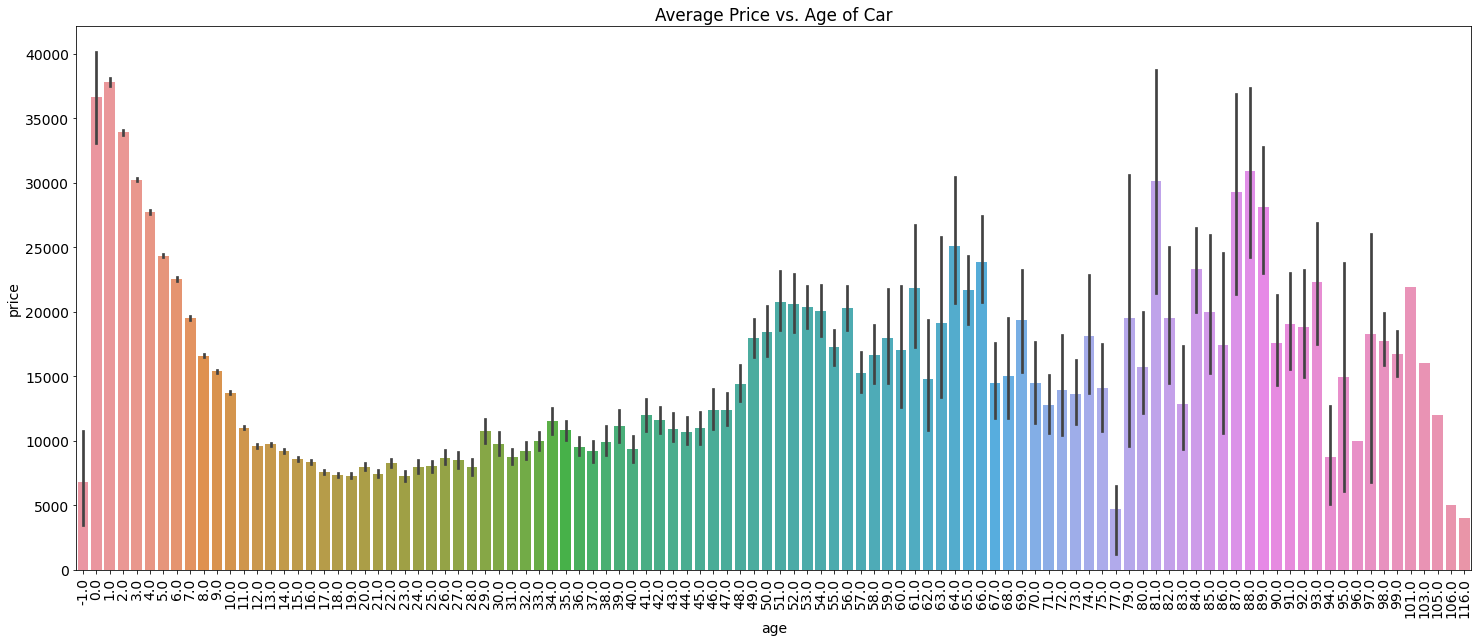

In [ ]:
plt.figure(figsize=(25, 10))
sns.barplot(data=data_df, x='age', y='price')
plt.title('Average Price vs. Age of Car')
plt.xticks(rotation=90)
plt.show()

The price of the cars goes down the older they get up to around 50 years old which is where it's a fair assumption of them being good quality antique cars which can fetch a decent amount of money.

# 7. Training/Validation/Test

## Section Outline

- Create a split of 60/20/20 for Train/Val/Test datasets
- Separate input columns from output
- Separate numerical columns from categorical
- Create a dataframe for each of the splits for inputs and a series for the output

In [ ]:
# create training, validation and test split dataframes
train_val_df, test_df = train_test_split(data_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(data_df, test_size=0.25, random_state=42)

In [ ]:
train_df.sample(5)

,region,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,posting_date,age,new_tires,heated_seats,auto_headlight,leather
349556,others,29990,toyota,good,6,gas,43182.0,clean,other,4wd,NaN,pickup,2021-04-25T12:41:14-0400,9.0,0,0,0,0
252291,central NJ,9500,gmc,NaN,8,gas,138866.0,clean,automatic,4wd,NaN,SUV,2021-04-11T08:32:50-0400,13.0,0,0,0,0
330195,others,14995,chevrolet,excellent,4,gas,44980.0,clean,automatic,fwd,mid-size,sedan,2021-04-30T09:19:46-0400,7.0,0,0,0,1
82274,others,33800,lincoln,excellent,6,gas,24500.0,clean,automatic,4wd,mid-size,sedan,2021-04-22T20:43:17-0600,3.0,0,0,0,0
78522,others,8995,ford,excellent,4,gas,132334.0,NaN,automatic,NaN,NaN,SUV,2021-05-03T17:16:12-0600,10.0,0,0,0,0


In [ ]:
val_df.sample(5)

,region,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,posting_date,age,new_tires,heated_seats,auto_headlight,leather
128288,others,10991,nissan,excellent,4,gas,66571.0,NaN,other,NaN,NaN,SUV,2021-05-02T11:33:02-1000,8.0,0,0,0,0
407126,others,2500,audi,good,8,gas,116000.0,clean,automatic,4wd,full-size,sedan,2021-05-04T19:45:33-0700,20.0,0,0,0,0
246210,others,12950,ford,NaN,8,gas,135908.0,rebuilt,automatic,4wd,NaN,truck,2021-04-15T23:46:02-0700,8.0,0,0,0,0
347187,others,18990,mazda,good,0,gas,18553.0,clean,other,fwd,NaN,sedan,2021-04-29T21:11:30-0400,3.0,0,0,0,0
297156,columbus,26500,jeep,NaN,0,other,49996.0,clean,automatic,4wd,NaN,SUV,2021-04-16T14:09:21-0400,4.0,0,0,0,0


In [ ]:
test_df.sample(5)

,region,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,posting_date,age,new_tires,heated_seats,auto_headlight,leather
222301,others,2200,honda,good,4,gas,164000.0,clean,automatic,NaN,NaN,SUV,2021-04-21T10:20:17-0500,22.0,0,0,0,0
369332,dallas / fort worth,3450,lincoln,excellent,6,gas,249900.0,clean,automatic,fwd,mid-size,sedan,2021-05-03T17:32:31-0500,12.0,1,0,0,1
221764,others,13995,nissan,NaN,4,gas,85137.0,clean,automatic,fwd,NaN,sedan,2021-04-29T18:05:27-0500,6.0,0,1,0,1
202958,grand rapids,14990,honda,good,0,gas,77726.0,clean,other,fwd,NaN,coupe,2021-04-08T09:15:25-0400,6.0,0,0,0,0
47436,others,24995,ford,NaN,0,gas,117453.0,clean,automatic,NaN,NaN,NaN,2021-04-16T13:02:38-0700,7.0,0,0,0,0


In [ ]:
# separate input and target columns
input_cols = ['manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'age', 'new_tires', 'heated_seats', 'auto_headlight', 'leather']

target_cols = 'price'


# separate numeric and categorical columns as well as columns that are already in binary
numeric_cols = ['age', 'odometer', 'cylinders']

categorical_cols = ['manufacturer', 'condition', 'fuel', 'title_status', 
                    'transmission', 'drive', 'size', 'type']

pre_encoded_cols = ['new_tires', 'heated_seats', 'auto_headlight', 'leather']

In [ ]:
# separate the dataframes into inputs and targets
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

# 8. Imputation, Scaling and Encoding

## Section Outline

- Imputing (filling) missing values into the dataset which can use various techniques such as filling missing values using the mean of the column
- Scaling numerical values from 0 to 1 for every numerical column to prevent columns with larger values from eclipsing other columns
- Encoding categorical columns using [Label Encoding](https://www.kaggle.com/code/jominjae/used-car-price-prediction-lgb)
- Create the final three datasets for training, validation and test using the scaled numerical columns and the encoded columns

## Imputation

### Impute Numeric Columns

In [ ]:
imputer = SimpleImputer(strategy='mean').fit(data_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].isna().sum()

age          0
odometer     0
cylinders    0
dtype: int64

### Impute Categorical Columns

In [ ]:
data_df = data_df.replace({pd.NA: np.nan})

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit(data_df[categorical_cols])

In [ ]:
train_inputs[categorical_cols] = imputer.transform(train_inputs[categorical_cols])
val_inputs[categorical_cols] = imputer.transform(val_inputs[categorical_cols])
test_inputs[categorical_cols] = imputer.transform(test_inputs[categorical_cols])

In [ ]:
test_inputs[categorical_cols].isna().sum()

manufacturer    0
condition       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
dtype: int64

## Scaling

In [ ]:
scaler = MinMaxScaler().fit(data_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
test_inputs[numeric_cols].describe().loc[['min', 'max']]

,age,odometer,cylinders
min,0.000000,0.000014,0.0
max,0.871795,0.999721,1.0


## Encoding

In [ ]:
for i in data_df[categorical_cols]:
  encoder = LabelEncoder()
  train_inputs[i] = encoder.fit_transform(train_inputs[i])
  val_inputs[i] = encoder.fit_transform(val_inputs[i])
  test_inputs[i] = encoder.fit_transform(test_inputs[i])

In [ ]:
train_inputs.sample(5)

,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,age,new_tires,heated_seats,auto_headlight,leather
186823,13,0,0.000000,2,0.296550,0,0,0,1,0,0.076923,0,0,0,0
154617,10,0,0.333333,2,0.468386,0,0,0,1,0,0.128205,0,0,0,0
122619,10,0,0.250000,2,0.187498,0,1,0,1,3,0.256410,0,0,0,0
410309,8,0,0.666667,0,0.307116,0,0,0,1,10,0.068376,0,0,0,0
46544,21,2,0.000000,4,0.109708,0,2,0,1,8,0.042735,0,0,0,0


In [ ]:
val_inputs.sample(5)

,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,age,new_tires,heated_seats,auto_headlight,leather
307447,8,0,0.500000,2,0.119366,0,0,2,1,8,0.034188,0,0,0,1
87799,22,0,0.000000,2,0.294319,0,1,0,1,9,0.102564,0,0,0,0
187039,8,0,0.666667,2,0.513793,0,0,0,1,9,0.051282,0,0,0,0
379773,21,0,0.000000,2,0.470000,0,0,0,1,10,0.068376,0,0,0,0
397284,22,0,0.333333,2,0.474517,0,0,0,1,12,0.145299,0,0,0,0


In [ ]:
test_inputs.sample(5)

,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,age,new_tires,heated_seats,auto_headlight,leather
79048,24,0,0.000000,2,0.191425,0,0,0,1,9,0.034188,0,0,0,0
272588,5,0,0.000000,2,0.257998,0,0,1,1,9,0.085470,0,0,0,0
421004,13,0,0.000000,2,0.421520,0,0,0,1,9,0.136752,0,0,0,0
218306,10,2,0.333333,2,0.793105,0,0,1,1,9,0.170940,0,0,0,0
64986,2,0,0.000000,0,0.286454,0,0,0,0,9,0.068376,0,0,0,0


# 9. Dumb/Benchmark Model - Mean Value

## Section Outline
- Use the mean value of the arrival delay column as the predictor
- Evaluate the "Dumb" model using [RMSE](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/) (Root Mean Squared Error)

In [ ]:
def return_mean(inputs):
  return np.full(len(inputs), data_df[target_cols].mean())

In [ ]:
train_preds = return_mean(train_inputs)
val_preds = return_mean(val_inputs)
test_preds = return_mean(test_inputs)

In [ ]:
train_preds

array([18602.67787449, 18602.67787449, 18602.67787449, ...,
       18602.67787449, 18602.67787449, 18602.67787449])

In [ ]:
train_targets

89400      6450
299658    10230
69827     36590
165509    13995
114449     9550
          ...  
148522    13900
316635    13991
162306    11995
180009    35888
150944    25990
Name: price, Length: 261268, dtype: int64

## i. Evaluate Benchmark

In [ ]:
# Compute RMSE
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
test_rmse = mean_squared_error(test_targets, test_preds, squared=False)

# Compute MAE
train_mae = mean_absolute_error(train_targets, train_preds)
val_mae = mean_absolute_error(val_targets, val_preds)
test_mae = mean_absolute_error(test_targets, test_preds)

# Compute MAPE
train_mape = mean_absolute_percentage_error(train_targets, train_preds)
val_mape = mean_absolute_percentage_error(val_targets, val_preds)
test_mape = mean_absolute_percentage_error(test_targets, test_preds)

print("RMSE - Training Error: {}, Validation Error: {}, Test Error: {}".format(round(train_rmse, 4), round(val_rmse, 4), round(test_rmse, 4)))
print("MAE - Training Error: {}, Validation Error: {}, Test Error: {}".format(round(train_mae, 4), round(val_mae, 4), round(test_mae, 4)))
print("MAPE - Training Error: {}, Validation Error: {}, Test Error: {}".format(round(train_mape, 4), round(val_mape, 4), round(test_mape, 4)))
mean_model = ((train_rmse, val_rmse, test_rmse), (train_mae, val_mae, test_mae), (train_mape, val_mape, test_mape))
mean_model

RMSE - Training Error: 13627.2715, Validation Error: 13631.0538, Test Error: 13651.4657
MAE - Training Error: 10838.2615, Validation Error: 10820.711, Test Error: 10843.0773
MAPE - Training Error: 1.227, Validation Error: 1.2151, Test Error: 1.2198


((13627.271485399448, 13631.053780770968, 13651.465712945068),
 (10838.261519354804, 10820.7109882381, 10843.077258657646),
 (1.2269786402330598, 1.2150692144073776, 1.2197651711958726))

# 10. Machine Learning Models

The machine learning models being tested in this section are as follows:

- Linear Models
  - [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
  - [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)
  - [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)
  - [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)

- Tree Based Models
  - [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)
  - [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

- Gradient Boosting
  - [XGBoost](https://xgboost.readthedocs.io/en/stable/python/index.html)


The regression metrics being used to evaluate the models in this section are as follows:

- [Root Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)
- [Mean Absolute Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)
- [Mean Absolute Percent Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error)

In [ ]:
def try_model(model):
  # Fit the model
  model.fit(train_inputs, train_targets)
  
  # Generate predictions
  train_preds = model.predict(train_inputs)
  val_preds = model.predict(val_inputs)
  test_preds = model.predict(test_inputs)
  
  # Compute RMSE
  train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
  val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
  test_rmse = mean_squared_error(test_targets, test_preds, squared=False)

  # Compute MAE
  train_mae = mean_absolute_error(train_targets, train_preds)
  val_mae = mean_absolute_error(val_targets, val_preds)
  test_mae = mean_absolute_error(test_targets, test_preds)

  # Compute MAPE
  train_mape = mean_absolute_percentage_error(train_targets, train_preds)
  val_mape = mean_absolute_percentage_error(val_targets, val_preds)
  test_mape = mean_absolute_percentage_error(test_targets, test_preds)

  print("RMSE - Training Error: {}, Validation Error: {}, Test Error: {}".format(round(train_rmse, 4), round(val_rmse, 4), round(test_rmse, 4)))
  print("MAE - Training Error: {}, Validation Error: {}, Test Error: {}".format(round(train_mae, 4), round(val_mae, 4), round(test_mae, 4)))
  print("MAPE - Training Error: {}, Validation Error: {}, Test Error: {}".format(round(train_mape, 4), round(val_mape, 4), round(test_mape, 4)))

  return ((train_rmse, val_rmse, test_rmse),(train_mae, val_mae, test_mae),(train_mape, val_mape, test_mape))

In [ ]:
def hyper_tune(model, params_dict):
  # Initialize grid
  grid = RandomizedSearchCV(estimator=model,
                          param_distributions=params_dict,
                          n_iter=50,
                          cv=5)
  
  grid_results = grid.fit(train_inputs, train_targets)

  best_model = grid_results.best_estimator_
  print(best_model)

  return best_model

In [ ]:
models = ["Simple Model - Mean Value", "Linear Regression", 
          "Ridge", "Lasso", "Elastic Net", 
          "Decision Tree Regressor - base", "Decision Tree Regressor - hypertuned",
          "Random Forest Regressor - base", "Random Forest Regressor - hypertuned",
          "XGB Regressor - base", "XGB Regressor - hypertuned"]

## i. Linear Models

### Linear Regression

In [ ]:
%%time
lin_model= try_model(LinearRegression())
lin_model

RMSE - Training Error: 10217.8243, Validation Error: 10207.1627, Test Error: 10208.294
MAE - Training Error: 7675.2016, Validation Error: 7652.297, Test Error: 7645.8029
MAPE - Training Error: 0.7147, Validation Error: 0.7047, Test Error: 0.705
CPU times: user 137 ms, sys: 144 ms, total: 280 ms
Wall time: 124 ms


((10217.824325567464, 10207.162687009897, 10208.29399821383),
 (7675.201599562264, 7652.2970172507585, 7645.802923494016),
 (0.7146783974148948, 0.7047211245000645, 0.7049653249632825))

### Ridge

In [ ]:
%%time
rid_model = try_model(Ridge())
rid_model

RMSE - Training Error: 10217.8246, Validation Error: 10207.1593, Test Error: 10208.3005
MAE - Training Error: 7675.229, Validation Error: 7652.322, Test Error: 7645.8347
MAPE - Training Error: 0.7147, Validation Error: 0.7047, Test Error: 0.705
CPU times: user 104 ms, sys: 186 ms, total: 290 ms
Wall time: 74.9 ms


((10217.824557023661, 10207.159296572123, 10208.300529658038),
 (7675.229037750101, 7652.3219815678185, 7645.834705861545),
 (0.7146971319659685, 0.7047382354619416, 0.7049826557414888))

### Lasso

In [ ]:
%%time
las_model = try_model(Lasso())
las_model

RMSE - Training Error: 10217.839, Validation Error: 10207.1555, Test Error: 10208.3446
MAE - Training Error: 7675.3911, Validation Error: 7652.4293, Test Error: 7645.9841
MAPE - Training Error: 0.7148, Validation Error: 0.7048, Test Error: 0.7051
CPU times: user 152 ms, sys: 192 ms, total: 344 ms
Wall time: 90.9 ms


((10217.83898289622, 10207.155481364485, 10208.34460588108),
 (7675.391089705469, 7652.429276634139, 7645.984119553048),
 (0.7147851929280428, 0.7048081086103786, 0.7050555541270723))

### Elastic Net

In [ ]:
%%time
ela_model = try_model(ElasticNet())
ela_model

RMSE - Training Error: 12707.1117, Validation Error: 12710.7676, Test Error: 12730.1136
MAE - Training Error: 9940.907, Validation Error: 9936.5076, Test Error: 9956.5338
MAPE - Training Error: 1.1171, Validation Error: 1.1068, Test Error: 1.1109
CPU times: user 122 ms, sys: 186 ms, total: 308 ms
Wall time: 77.2 ms


((12707.111705638225, 12710.767634288915, 12730.11360471708),
 (9940.907010136805, 9936.507602443604, 9956.533831366398),
 (1.1170926154715717, 1.1068267720204095, 1.1108962430272171))

## ii. Tree Based Models

### Decision Tree Regressor

In [ ]:
tree = DecisionTreeRegressor(random_state=42)

In [ ]:
%%time
base_tree = try_model(tree)

RMSE - Training Error: 371.1455, Validation Error: 5657.3293, Test Error: 5647.764
MAE - Training Error: 31.1209, Validation Error: 2365.5747, Test Error: 2363.1245
MAPE - Training Error: 0.0037, Validation Error: 0.2349, Test Error: 0.236
CPU times: user 1.8 s, sys: 196 ms, total: 1.99 s
Wall time: 1.77 s


#### Hyperparameter Tuning for Decision Tree Regressor

In [ ]:
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
splitter="random"
min_samples_leaf = [7, 10, 15, 20, 25]
min_samples_split = [5, 10, 20, 50]
max_depth = [5,10,15,20]
max_features = [7, 11, 15]
min_weight_fraction_leaf = [0, 0.01, 0.05, 0.1, 0.15]

param_distributions = dict(min_samples_leaf=min_samples_leaf,
                           min_samples_split=min_samples_split,
                           max_depth=max_depth,
                           max_features=max_features,
                           min_weight_fraction_leaf=min_weight_fraction_leaf)

In [ ]:
%%time
dec_model = try_model(hyper_tune(tree, param_distributions))

DecisionTreeRegressor(max_depth=15, max_features=15, min_samples_leaf=7,
                      min_samples_split=20, min_weight_fraction_leaf=0,
                      random_state=42)
RMSE - Training Error: 5391.6064, Validation Error: 5932.2771, Test Error: 5943.8835
MAE - Training Error: 3360.8084, Validation Error: 3663.6461, Test Error: 3660.1244
MAPE - Training Error: 0.3051, Validation Error: 0.3235, Test Error: 0.3251
CPU times: user 1min 9s, sys: 280 ms, total: 1min 9s
Wall time: 1min 8s


In [ ]:
dec_model

((5106.39075767243, 5717.830852190726, 5722.218838038217),
 (3025.7044240831324, 3402.7028433944824, 3396.334506087028),
 (0.272803502417438, 0.30131245927188466, 0.3026311705483141))

### Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [ ]:
%%time
base_rf = try_model(rf)

RMSE - Training Error: 1674.2706, Validation Error: 4373.1727, Test Error: 4389.5262
MAE - Training Error: 780.8278, Validation Error: 2049.6787, Test Error: 2053.8042
MAPE - Training Error: 0.0821, Validation Error: 0.2107, Test Error: 0.212
CPU times: user 2min 47s, sys: 483 ms, total: 2min 48s
Wall time: 43.5 s


#### Hyperparameter Tuning for Random Forest Regression

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
max_leaf_nodes = [7, 9, 11, 13, 15]
min_samples_split = [50, 75, 100]
max_depth = [5,10,15,20]
max_features = [5, 7 ,9]
n_estimators = [100, 150, 200]

param_distributions = dict(max_leaf_nodes=max_leaf_nodes,
                           min_samples_split=min_samples_split,
                           max_depth=max_depth,
                           max_features=max_features,
                           n_estimators=n_estimators)

In [ ]:
%%time
rf_model = try_model(hyper_tune(rf, param_distributions))

RandomForestRegressor(max_depth=10, max_features=7, max_leaf_nodes=15,
                      min_samples_split=100, n_estimators=200, n_jobs=-1,
                      random_state=42)
RMSE - Training Error: 8245.172, Validation Error: 8230.0384, Test Error: 8239.5016
MAE - Training Error: 5909.5033, Validation Error: 5897.724, Test Error: 5887.5687
MAPE - Training Error: 0.5688, Validation Error: 0.5583, Test Error: 0.5595
CPU times: user 4min 42s, sys: 15 s, total: 4min 57s
Wall time: 28min 1s


In [ ]:
rf_model

((8245.171962114815, 8230.038440895249, 8239.501612550423),
 (5909.503280966511, 5897.724036142545, 5887.568666988796),
 (0.568751175960009, 0.5583472723414873, 0.5594562290127977))

## iii. Gradient Boosting with XGBoost

In [ ]:
xgb = XGBRegressor(objective ='reg:squarederror', random_state=42, n_jobs=-1)

In [ ]:
base_xgb = try_model(xgb)

RMSE - Training Error: 6831.7158, Validation Error: 6811.8487, Test Error: 6828.0714
MAE - Training Error: 4582.0473, Validation Error: 4585.6161, Test Error: 4581.5436
MAPE - Training Error: 0.3934, Validation Error: 0.3858, Test Error: 0.3873


### Hyperparameter Tuning for XGBoost

The code for testing hyperparameters of XGBoost has been commented out to reduce processing time of the project. The results of the hyperparameter tuning for the model have been posted below.

In [ ]:
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'reg:squarederror',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
n_estimators = [50, 100, 200]
max_depth = [5, 10, 15, 20]
learning_rate = [0.1, 0.5, 0.9]
subsample = [0.1, 0.3, 0.5, 0.9]
colsample_bytree = [0.1, 0.3, 0.5, 0.9]

param_distributions = dict(n_estimators=n_estimators,
                           max_depth=max_depth,
                           learning_rate=learning_rate,
                           subsample=subsample,
                           colsample_bytree=colsample_bytree)

In [ ]:
%%time
XGB_model = try_model(hyper_tune(xgb, param_distributions))

XGBRegressor(colsample_bytree=0.5, learning_rate=0.5, max_depth=15,
             n_estimators=50, n_jobs=-1, objective='reg:squarederror',
             random_state=42, subsample=0.9)
RMSE - Training Error: 3129.8755, Validation Error: 4838.3586, Test Error: 4858.8152
MAE - Training Error: 1873.8871, Validation Error: 2789.0152, Test Error: 2794.4223
MAPE - Training Error: 0.1837, Validation Error: 0.273, Test Error: 0.2749
CPU times: user 4h 25min 59s, sys: 18.1 s, total: 4h 26min 17s
Wall time: 1h 7min 45s


In [ ]:
XGB_model

((3129.875470632183, 4838.358611758345, 4858.815180512766),
 (1873.8871498107837, 2789.015214854243, 2794.4223087742976),
 (0.18373366933910476, 0.2729571954478457, 0.2748630165524575))

# 11. Comparing Results

In [ ]:
def results_list(model):
  errors = model[0] + model[1] + model[2]
  return list(errors)

mean_list = results_list(mean_model)
lin_list = results_list(lin_model)
rid_list = results_list(rid_model)
las_list = results_list(las_model)
ela_list = results_list(ela_model)
base_tree_list = results_list(base_tree)
dec_list = results_list(dec_model)
base_rf_list = results_list(base_rf)
ran_list = results_list(rf_model)
base_XGB_list = results_list(base_xgb)
XGB_list = results_list(XGB_model)

results_matrix = np.array([mean_list, lin_list, rid_list, las_list, ela_list, base_tree_list, dec_list, base_rf_list, ran_list, base_XGB_list, XGB_list])

In [ ]:
results_df = pd.DataFrame(results_matrix, columns=["RMSE Training", "RMSE Validation", "RMSE Test", "MAE Training", "MAE Validation", "MAE Test", "MAPE Training", "MAPE Validation", "MAPE Test"])
results_df["Model"] = models
results_df

,RMSE Training,RMSE Validation,RMSE Test,MAE Training,MAE Validation,MAE Test,MAPE Training,MAPE Validation,MAPE Test,Model
0,13627.271485,13631.053781,13651.465713,10838.261519,10820.710988,10843.077259,1.226979,1.215069,1.219765,Simple Model - Mean Value
1,10217.824326,10207.162687,10208.293998,7675.201600,7652.297017,7645.802923,0.714678,0.704721,0.704965,Linear Regression
2,10217.824557,10207.159297,10208.300530,7675.229038,7652.321982,7645.834706,0.714697,0.704738,0.704983,Ridge
3,10217.838983,10207.155481,10208.344606,7675.391090,7652.429277,7645.984120,0.714785,0.704808,0.705056,Lasso
4,12707.111706,12710.767634,12730.113605,9940.907010,9936.507602,9956.533831,1.117093,1.106827,1.110896,Elastic Net
5,371.145517,5657.329297,5647.764030,31.120931,2365.574674,2363.124492,0.003720,0.234858,0.236005,Decision Tree Regressor - base
6,5391.606371,5932.277083,5943.883548,3360.808401,3663.646108,3660.124430,0.305134,0.323479,0.325133,Decision Tree Regressor - hypertuned
7,1674.270631,4373.172703,4389.526153,780.827773,2049.678738,2053.804249,0.082053,0.210682,0.212003,Random Forest Regressor - base
8,8245.171962,8230.038441,8239.501613,5909.503281,5897.724036,5887.568667,0.568751,0.558347,0.559456,Random Forest Regressor - hypertuned
9,6831.715772,6811.848745,6828.071388,4582.047337,4585.616119,4581.543617,0.393403,0.385815,0.387282,XGB Regressor - base


For all three of the test sets, the base Random Forest Regressor model shows by far the biggest improvement over the simple Mean Value model.

In [ ]:
RMSE_percent_diff = pd.DataFrame()
RMSE_percent_diff['RMSE Test % Difference'] = (results_df.loc[0, 'RMSE Test'] / results_df['RMSE Test']) * 100
RMSE_percent_diff['Model'] = results_df['Model']
RMSE_percent_diff.sort_values('RMSE Test % Difference', ascending=False)

,RMSE Test % Difference,Model
7,311.000897,Random Forest Regressor - base
10,280.962852,XGB Regressor - hypertuned
5,241.714520,Decision Tree Regressor - base
6,229.672496,Decision Tree Regressor - hypertuned
9,199.931502,XGB Regressor - base
8,165.683149,Random Forest Regressor - hypertuned
1,133.729159,Linear Regression
2,133.729073,Ridge
3,133.728496,Lasso
4,107.237580,Elastic Net


In [ ]:
MAE_percent_diff = pd.DataFrame()
MAE_percent_diff['MAE Test % Difference'] = (results_df.loc[0, 'MAE Test'] / results_df['MAE Test']) * 100
MAE_percent_diff['Model'] = results_df['Model']
MAE_percent_diff.sort_values('MAE Test % Difference', ascending=False)

,MAE Test % Difference,Model
7,527.950863,Random Forest Regressor - base
5,458.844944,Decision Tree Regressor - base
10,388.025719,XGB Regressor - hypertuned
6,296.248870,Decision Tree Regressor - hypertuned
9,236.668646,XGB Regressor - base
8,184.169016,Random Forest Regressor - hypertuned
1,141.817378,Linear Regression
2,141.816789,Ridge
3,141.814018,Lasso
4,108.904137,Elastic Net


In [ ]:
MAPE_percent_diff = pd.DataFrame()
MAPE_percent_diff['MAPE Test % Difference'] = (results_df.loc[0, 'MAPE Test'] / results_df['MAPE Test']) * 100
MAPE_percent_diff['Model'] = results_df['Model']
MAPE_percent_diff.sort_values('MAPE Test % Difference', ascending=False)

,MAPE Test % Difference,Model
7,575.351576,Random Forest Regressor - base
5,516.839157,Decision Tree Regressor - base
10,443.772024,XGB Regressor - hypertuned
6,375.159098,Decision Tree Regressor - hypertuned
9,314.955437,XGB Regressor - base
8,218.026918,Random Forest Regressor - hypertuned
1,173.024846,Linear Regression
2,173.020593,Ridge
3,173.002704,Lasso
4,109.800099,Elastic Net


# 12. Conclusion, Future Improvements and References

## i. Conclusion

The intention for this project is to show the use of machine learning in taking large sets of data and using it to display useful information. In this case its a prediction of used car prices given factors such as the manufacturer, the year of manufacturing, features in the car, number of cylinders, condition etc. The various machine learning models used in this project (linear models, tree based models, gradient boosting) all showed a visible improvement over the base mean value model, the lowest of which being 7.24%.

## ii. Future Improvements

Future improvements for this project could be more time spent with hyperparameter tuning to further improve the results. Additionally, some more feature engineering to provide the machine learning models with information to decrease the error.

## iii. References

- https://scikit-learn.org/stable/modules/classes.html#
- https://stackoverflow.com/
- https://github.com/dmlc/xgboost/issues/4599
- https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/linear-regression-with-scikit-learn
- https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/decision-trees-and-random-forests
- https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/how-to-approach-machine-learning-problems
- https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/gradient-boosting-machines-with-xgboost
- https://seaborn.pydata.org/
- https://datascience.stackexchange.com/questions/109322/why-does-gridsearchcv-fit-fail
- https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
- https://www.kaggle.com/code/ashmani999/preowned-car-price-prediction
- https://www.kaggle.com/code/jominjae/used-car-price-prediction-lgb


# 13. Save the Project

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/nsrinath97/used-car-price-prediction-machine-learning-project


'https://jovian.ai/nsrinath97/used-car-price-prediction-machine-learning-project'